In [28]:
import zipfile

import numpy as np
import pandas as pd
import os
import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

In [3]:
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
path = '/kaggle/working/train'

In [5]:
X = []
y = []
for filename in os.listdir(path):
    imgPath = os.path.join(path, filename)
    img = cv2.imread(imgPath)
    img = cv2.resize(img, (100,100))
    label = filename.split('.')[0]
    X.append(img)
    y.append(label)

In [6]:
print(len(X))
print(len(y))

25000
25000


In [7]:
X = np.array(X)
y = np.array(y)

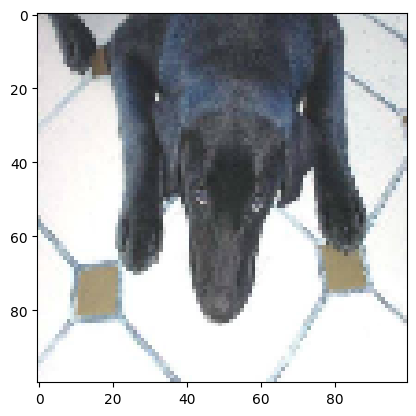

In [8]:
plt.imshow(X[1], cmap='gray')

In [9]:
X = X.reshape(len(X), -1)

In [10]:
print(X.shape)
print(y.shape)

(25000, 30000)
(25000,)


In [11]:
y

array(['cat', 'dog', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [12]:
X

array([[  7,  14,  30, ...,  68,  72,  61],
       [184, 182, 182, ..., 255, 255, 255],
       [ 82,  74,  73, ..., 220, 232, 236],
       ...,
       [119, 117, 117, ...,  80,  92,  92],
       [107, 114, 126, ...,  69,  69,  69],
       [ 20,  15,  17, ...,  24,  11,   3]], dtype=uint8)

In [13]:
pd.Series(y).value_counts()

cat    12500
dog    12500
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())
X_train = X_train/255
X_test = X_test/255
print(X_train.max(), X_train.min())
print(X_test.max(), X_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20000, 30000)
(20000,)
(5000, 30000)
(5000,)


In [17]:
print(X_train.ndim)
print(y_train.ndim)
print(X_test.ndim)
print(y_test.ndim)

2
1
2
1


In [18]:
model = SVC(kernel='rbf')

In [19]:
model.fit(X_train, y_train)

SVC()

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6812


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         cat       0.68      0.69      0.68      2480
         dog       0.69      0.68      0.68      2520

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



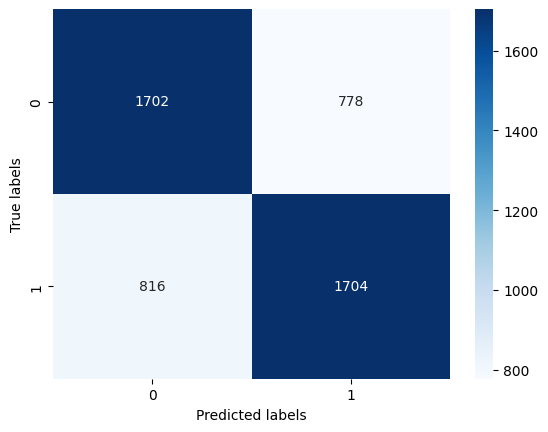

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [31]:
joblib.dump(model, 'cat_vs_dog_model.pkl')

['cat_vs_dog_model.pkl']